In [1]:
from collections import Counter
import numpy as np
import pandas as pd

## Classification problem

We will start by writting a k-nearest neighbours classifier, so we can test it on different datasets and analyse its performance 

Since the training step of k-nearest neighbours is trivial, all we need to do is to write the "predict" function.
Lets remind ourselves how the prediction for a given data point is calculated:<br>
First, we should calculate the distances between the new point and every point in the training set.<br>
Next, we have to select k training points that are closest to the new point <br>
Finally, the prediction can be made, by selecting the majority class from selected neighbours 

In [2]:
class kNNClassifier:

    # constructor - saving the value of k
    def __init__(self, k):
        self.k = k

    # saving dataset for later use
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # predicting labels of new data
    def predict(self, X):  
        preds = []
        for ex in X:
            #calculate distances
            pass
            #find k closest data points
  
            #predict the majority class


        return preds

Before we look at the performance of our newly constructed model, let's take a look at different datasets that will be used for testing. We will use matplotlib to see how different datasets look

In [3]:
import matplotlib.pyplot as plt

# Moons dataset

In [4]:
# generating moons dataset
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)

ModuleNotFoundError: No module named 'sklearn'

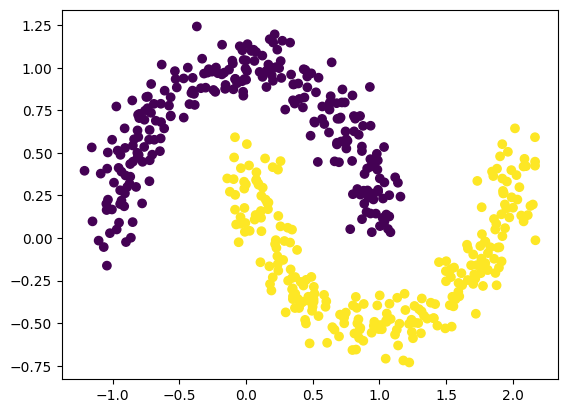

In [227]:
# plotting
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons)
plt.show()

# Digits dataset

In [228]:
# loading digits dataset
from sklearn.datasets import load_digits

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

Since there are 1797 examples in the data set, only a few will be drawn

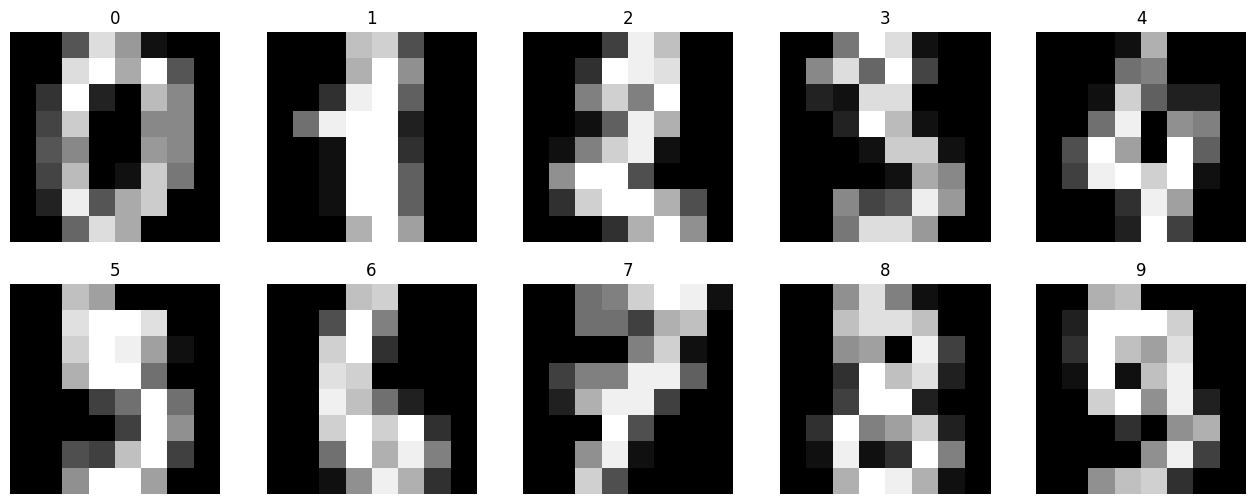

In [229]:
# plotting
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_digits[i].reshape(8, 8), cmap='gray')
    plt.title(y_digits[i])
    plt.axis('off')
plt.show()

# Student performance dataset

In [230]:
# load car evaluation dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

car_eval = pd.read_csv(url, names=columns, header=None)
print(car_eval)


     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


As we can see, this time we are dealing with a dataset containing qualitative variables. This is troubling, because we cannot easily calculate distances. <br>
There are many way to tackle this problem, but today we will focus on two of them:<br>
We can change variables to be quantitative, by simply assigning a numerical value for each label a variable can have<br>
In cases, when assigning numbers doesn't seem straight forward, we can also make different variables, that will encode information about labels, for example splitting "persons" into two columns: "less than 5" and "5 or more".

For now, let's see what values do different variables take

In [231]:
for col in car_eval.columns:
    print(f"Name: {col}, unique values: {car_eval[col].unique()}")

Name: buying, unique values: ['vhigh' 'high' 'med' 'low']
Name: maint, unique values: ['vhigh' 'high' 'med' 'low']
Name: doors, unique values: ['2' '3' '4' '5more']
Name: persons, unique values: ['2' '4' 'more']
Name: lug_boot, unique values: ['small' 'med' 'big']
Name: safety, unique values: ['low' 'med' 'high']
Name: class, unique values: ['unacc' 'acc' 'vgood' 'good']


Having seen the datasets, that we will be using, let's start predicting!

We will start with the moons dataset - since we need training and testing data, we will split our original dataset:

In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=42, train_size=0.8)
print(X_train.shape, X_test.shape)

(400, 2) (100, 2)


Having split the data we can try to classify it!

In [233]:
# choose value of k:
k = 5

# create classifier
knn_clf = kNNClassifier(k)

# train the model
knn_clf.fit(X_train, y_train)

# make predictions
y_pred = knn_clf.predict(X_test)

We have made some predictions, but we still lack a method to compare the results with the actual labels. To address this, we will implement a basic metric for prediction evaluation - accuracy, which is the fraction of correct predictons:

In [234]:
def accuracy_score(y_true, y_pred):
    pass

Let's test how our classifier did:

In [ ]:
accuracy_score(y_test, y_pred)

As we can see in this example, the kNN algorithm predicted data labels perfectly. Sadly, it will not be the case in general. Try differnet values of "noise" in the data generation cell and see how the accuracy score changes.

Let's turn our attention to the second dataset - digits. The task is similar, so I hope You can manage training kNN model yourselves.

In [ ]:
# prepare data for training

In [237]:
# build classifier

In [ ]:
# check accuracy score

If that part is clear, we can continue to the last classification problem: the car evaluation dataset. The first step is to prepare the data, so that the distances can be calculated. Here is an example of how the variables can be changed:

In [239]:
# encode the "safety" variable to numeric values
car_eval["safety"] = pd.Categorical(car_eval["safety"]).codes

# encode the "class" variable, using one-hot encoding, to two columns
car_eval = pd.get_dummies(car_eval, columns=["maint"], dtype=int)

car_eval

,buying,doors,persons,lug_boot,safety,class,maint_high,maint_low,maint_med,maint_vhigh
0,vhigh,2,2,small,1,unacc,0,0,0,1
1,vhigh,2,2,small,2,unacc,0,0,0,1
2,vhigh,2,2,small,0,unacc,0,0,0,1
3,vhigh,2,2,med,1,unacc,0,0,0,1
4,vhigh,2,2,med,2,unacc,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1723,low,5more,more,med,2,good,0,1,0,0
1724,low,5more,more,med,0,vgood,0,1,0,0
1725,low,5more,more,big,1,unacc,0,1,0,0
1726,low,5more,more,big,2,good,0,1,0,0


Using this example encode the rest of the variables (you can change the examplary encoding)

In [ ]:
# encode the remaining variables to numeric values

Since different variables can take on values from different ranges, we have to normalize each variable, so that they all have equal influence on the final prediction

In [ ]:
# normalize columns to 0-1 range

There is only one thing left to do, before attempting the classification problem - we have to choose the variable that we want to predict. Here is an example, but feel free to experiment with different ones:

In [242]:
targets = car_eval['class'].to_numpy()
features = car_eval.drop(columns = ['class']).to_numpy()

print(targets.shape, features.shape)

(1728,) (1728, 9)


We can now try to predict the selected variable with the kNN classificator

In [243]:
# prepare data for training

(1382, 9) (346, 9)


In [244]:
# build classifier

In [ ]:
# check accuracy score